## Bienvenidos al ambiente de ejecución de código Colab!!!

- **Aca ejecutaremos la introducción a Python**

En el presente ejemplo comenzaremos con un dataset **público** utilizado para la formación de **Machine Learning** denominado Iris dataset que se basa en describir las longitudes del sépalo y pétalo de tres tipos de flores: Setosa, virginica y versicolor. Este dataset es uno de los más básicos y usados para introducirnos en el mundo de la ciencia de datos.

Podemos ver una breve historia de este dataset [acá](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris)

In [1]:
#Importamos librerías útiles
import pandas as pd #Es una librería para manipulación de datos
import seaborn as sns  #Es una librería para poder hacer nuestros gráficos rápidos y atractivos

In [2]:
#Asignamos la variable iris 
iris = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Iris_people/iris.csv')

In [3]:
#Mostramos los primeros cinco (5) registros del dataset iris con la instrucción head. Este número se muestra por defecto
iris.head() 

largo_sepalo  ancho_sepalo  largo_petalo  ancho_petalo    tipo_flor
0           5.1           3.5           1.4           0.2  Iris-setosa
1           4.9           3.0           1.4           0.2  Iris-setosa
2           4.7           3.2           1.3           0.2  Iris-setosa
3           4.6           3.1           1.5           0.2  Iris-setosa
4           5.0           3.6           1.4           0.2  Iris-setosa

Como resultado hemos obtenido 5 filas con las observaciones de las características de los pétalos y el sépalo.
    Hay una columna a la izquierda (**en negrita**) que hace referencia a la posición de cada fila. A esto se le llama index (índice) y nos servirá para ubicar más rápidos nuestros datos. 
Hay una columna a la derecha denominada *species* que asigna el tipo de flor de cada observación. Esta columna es importante porque será la **variable objetivo** que vamos a predecir o tratar de acercarnos usando el algoritmo de aprendizaje supervisado: KNN (que nos formará clusters)

In [4]:
iris.describe()

largo_sepalo  ancho_sepalo  largo_petalo  ancho_petalo
count    150.000000    150.000000    150.000000    150.000000
mean       5.843333      3.054000      3.758667      1.198667
std        0.828066      0.433594      1.764420      0.763161
min        4.300000      2.000000      1.000000      0.100000
25%        5.100000      2.800000      1.600000      0.300000
50%        5.800000      3.000000      4.350000      1.300000
75%        6.400000      3.300000      5.100000      1.800000
max        7.900000      4.400000      6.900000      2.500000

In [5]:
iris.info()
#float, object, integer, hay más...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
largo_sepalo    150 non-null float64
ancho_sepalo    150 non-null float64
largo_petalo    150 non-null float64
ancho_petalo    150 non-null float64
tipo_flor       150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Graficando en Python con Seaborn

- Las librerías tienden a conservar un patrón a la hora de utilizarse. Es decir, no tienes que aprenderte cada código sino cómo está estructurada la librería para poder usarla con más facilidad. En este caso, **seaborn tiene dos formas generales de hacer un gráfico**, una forma general para hacer gráficos de una sola variable y otra forma para gráficos de dos o más variables. Veamos.  

##### Graficando una sola variable:

La primera gráfica que realizaremos hoy en clase será un **distplot**. Este gráfico es sino el más usado porque nos indica dos cosas: el histograma de la variable y la distribución de la misma. Como este gráfico depende de una sola variable, solo se necesita especificar esa variable dentro de la función.

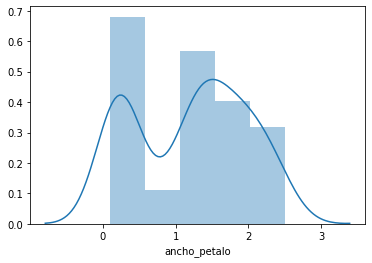

In [6]:
sns.distplot(iris["ancho_petalo"])
# También se puede especificar el número de intervalos (bins) que quiero para mi gráfico

###### Graficando dos o más variables:


A continuación haremos un **gráfico de dispersión** que requiere declarar antes **dos columnas del mismo dataset: x, y**.  Esta estructura de plote se mantendrá cada vez que queramos graficar dos variables.

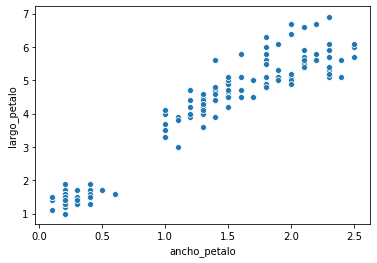

In [7]:
x =iris['ancho_petalo']
y= iris['largo_petalo']
sns.scatterplot(x, y,data=iris)

Podemos también agregar de manera fácil estos dos gráficos antes hechos. Existe una función en seaborn llamada **pairplot** y a grandes rasgos puedo plotear absolutamente toda la data.

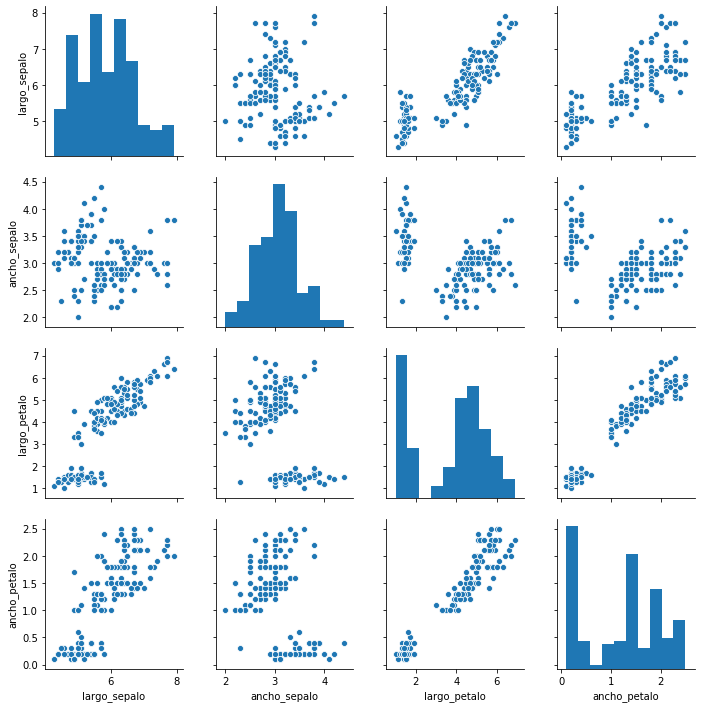

In [8]:
#El parámetro hue le da nombre a la leyenda del gráfico y el size permite limitar el tamaño del gráfico (mientras más pequeño es más facil ver)
sns.pairplot(iris)

# Tratamiento de la Data

Identificamos como **variable objetivo** (target) la columna 'tipo_flor'. Las demás variables serán las **predictoras** (features) para el modelo. También podemos obtener estadísticos básicos de estas variables.

In [9]:
#Creamos una variable y_iris para guardar la columna tipo_flor del dataset iris
y_iris = iris['tipo_flor']

In [10]:
#Creamos una variable X_iris para guardar el resultado de eliminar la columna tipo_flor del dataset iris
X_iris = iris.drop('tipo_flor', axis=1) 
#axis = 1 es para las columnas, axis = 0 es para las filas.

In [11]:
#Para visualizar el tamaño del dataset utilizamos el método shape, como resultado obtenemos el números de filas y columnas (en este orden)
X_iris.shape

(150, 4)

Estos descriptivos verifican que las cuatro variables almacenan **100 observaciones**, todas ellas con datos numéricos. Para este ejemplo no contamos con datos *categóricos* (no numéricos) y tampoco aparecen vacíos o errores. Sobre el tratamiento de este tipo de datos profundizaremos en las siguientes sesiones de clase.

## Haremos PCA para poder ver que una clusterización te agrupa de manera intuitiva los targets.


Para aplicar el modelo de *clustering* vamos a realizar una **reducción de dimensionalidad** donde las variables predictoras se reducen a solo dos (2) PCA -que son las iniciales de *Principal Component Analysis*- de esta manera vamos a visualizar el dataset iris en función de solo dos *nuevas variables predictoras* denominadas PCA1 y PCA2

In [12]:
#Importamos la librería PCA
from sklearn.decomposition import PCA

#Creamos  una variable feature_pca para asignar PCA, definimos el valor de n_components para limitar a dos las variables finales
features_pca = PCA(n_components=2)

In [13]:
#Adaptamos la variable creada feature_pca con la data guardada en X_iris
features_pca.fit(X_iris)

#Creamos una variable X_2D para guardar este último cambio
X_2D = features_pca.transform(X_iris)

In [14]:
print(X_2D)

[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]
 [-2.50652679  0.65193501]
 [-2.61314272  0.02152063]
 [-2.78743398 -0.22774019]
 [-3.22520045 -0.50327991]
 [-2.64354322  1.1861949 ]
 [-2.38386932  1.34475434]
 [-2.6225262   0.81808967]
 [-2.64832273  0.31913667]
 [-2.19907796  0.87924409]
 [-2.58734619  0.52047364]
 [-2.3105317   0.39786782]
 [-2.54323491  0.44003175]
 [-3.21585769  0.14161557]
 [-2.30312854  0.10552268]
 [-2.35617109 -0.03120959]
 [-2.50791723 -0.13905634]
 [-2.469056    0.13788731]
 [-2.56239095  0.37468456]
 [-2.63982127  0.31929007]
 [-2.63284791 -0.19007583]
 [-2.58846205 -0.19739308]
 [-2.41007734  0.41808001]
 [-2.64763667  0.81998263]
 [-2.59715948  1.10002193]
 [-2.67384469 -0.1066917 ]
 [-2.86699985  0.0771931 ]
 [-2.62522846  0.60680001]
 

Añadimos al dataset iris las dos dimensiones ya obtenidas: PCA 1 y PCA 2

In [15]:
#Añadimmos una columna denominada PCA1 al dataset iris usando la columna 0 de la variable X_2D, es decir la primera columna contando de izquierda a derecha
iris['PCA1'] = X_2D[:, 0]

#Añadimmos una columna denominada PCA2 al dataset iris usando la columna 1 de la variable X_2D, es decir la segunda columna contando de izquierda a derecha
iris['PCA2'] = X_2D[:, 1]

In [16]:
x =iris['PCA1']
y= iris['PCA2']
sns.scatterplot(x, y,hue='tipo_flor',data=iris)

# Clustering con Medias (KMeans)

Ahora vamos a seleccionar un **modelo de clustering o agrupamiento** denominado *Kmeans*. Este modelo lo vamos a adaptar con las nuevas dos dimensiones que obtuvimos a partir de X_iris (PCA1, PCA2). Ambas variables están guardadas en X_2D

In [17]:
#Importamos la librería KMeans
from sklearn.cluster import KMeans

#Creamos una variable kmeans para guardar el modelo Kmeans
#Definimos los parámetros n_clusters para limitar solo tres agrupamientos, también podemos definir el máximo de iteraciones con max_iter
kmeans = KMeans(n_clusters=3, max_iter=600)

In [18]:
#Perfilamos el modelo kmeans con los datos guardados en X_2D
kmeans = kmeans.fit(X_iris)

In [19]:
#Creamos una variable predicciones para obtener las predicciones usando el modelo kmeans a partir de los datos guardados en X_2D
predicciones = kmeans.predict(X_iris)

In [20]:
predicciones

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [21]:
iris['predicciones'] = predicciones
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'predicciones',data = iris)

# Clustering con Modas (KModes)
 Es usado para el clustering (agrupamiento) de variables categoricas. 

In [32]:
#Instalamos el modulo de kmodes
!pip install kmodes 

In [23]:
#Importamos las librerias necesarias: numpy y pandas para manipulacion de dataframes y uso de arrays
import numpy as np
import pandas as pd
#KModes para usar la implementacion del algoritmo en si
from kmodes.kmodes import KModes

In [24]:
#La función de KModes la establecemos con los siguientes parametros:
#n_clusters : numero entero de clusters a determinar
#init       : tipo de metodo para inicializar : 'Huang' , 'Cao' , 'random' (aleatorio)
#n_init     : numero entero de veces que correra el algoritmo cambiando el centroide de las cuales se desplegara la mejor salida en terminos de costo
km=KModes(n_clusters=3,init='Huang',n_init=5)

In [25]:
#Leeemos el archivo people.csv 
X_test=pd.read_csv('https://raw.githubusercontent.com/javalillo13689/hackspace/master/people.csv')

In [26]:
#Mostramos las primeras 3 filas de la data
X_test.head(3)

SEXO UNIVERSIDAD  PERFIL         CARRERA  POSICION  \
0    F       ULIMA   JOVEN  ADMINISTRACION  ANALISTA   
1    M       OTROS  ADULTO  ADMINISTRACION       NaN   
2    M       OTROS  ADULTO  ADMINISTRACION     OTROS   

  ESPECIALIZACION_DATA SCIENCE DIA_PREFERIDO  
0                           NO        SABADO  
1                           NO       VIERNES  
2                           NO       VIERNES

In [27]:
#Dado que observamos en la fila 2 en la columna posicion un valor NaN procedemos a eliminarlo
#en este caso ya que son datos perdidos o vacios que nos llevarian al error

#Para elimianar las filas con valores nulos usamos el metodo dropna
#inplace=True nos dice que incluya los cambios en la tabla X_test , de otro modo solo lo muestra
#más no lo modifica
X_test.dropna(inplace=True)
#Debido a la eliminación de las filas con valores nulos el indice se encuentra desordenado
#Para reiniciar los indices y mantener el orden de estos
X_test.reset_index(drop=True,inplace=True)

In [28]:
#Renombramos la data como data_kmodes(No obligatorio, se puede seguir usando X_test)
data_kmodes=X_test
#Mediante el metodo fit_predict ingresamos el dataframe data_kmodes para obtener
#los valores del cluster al cual pertenece cada fila
clusters=km.fit_predict(data_kmodes)

In [29]:
#A nuestro dataframe le agregamos una columna mas llamada cluster a la cual le asignamos
#los valores obtenidos en la celda anterior
X_test['cluster']=clusters

In [31]:
#Visualizamos a la izquierda del dataframe que se ha añido la columna cluster con
#valores del 0 al 2 que seria el identificador para cada cluster
X_test

SEXO UNIVERSIDAD  PERFIL          CARRERA    POSICION  \
0      F       ULIMA   JOVEN   ADMINISTRACION    ANALISTA   
1      M       OTROS  ADULTO   ADMINISTRACION       OTROS   
2      M       OTROS  ADULTO   ADMINISTRACION       OTROS   
3      F  SAN MARCOS   JOVEN   CIENCIAS PURAS  ESTUDIANTE   
4      M  SAN MARCOS   JOVEN   CIENCIAS PURAS       OTROS   
..   ...         ...     ...              ...         ...   
110    M       OTROS  ADULTO  OTRA INGENIERIA       LIDER   
111    F        PUCP   JOVEN  OTRA INGENIERIA       OTROS   
112    M         UNI   JOVEN  OTRA INGENIERIA       LIDER   
113    M       OTROS   JOVEN  OTRA INGENIERIA  ESTUDIANTE   
114    M  SAN MARCOS   JOVEN  OTRA INGENIERIA       OTROS   

    ESPECIALIZACION_DATA SCIENCE DIA_PREFERIDO  cluster  
0                             NO        SABADO        0  
1                             NO       VIERNES        0  
2                             NO       VIERNES        0  
3                             NO        SABADO        0  
4                             NO        SABADO        0  
..                           ...           ...      ...  
110                           NO        SABADO        0  
111                           NO       VIERNES        0  
112                           NO       VIERNES        0  
113                           NO       VIERNES        0  
114                           NO       VIERNES        1  

[115 rows x 8 columns]